# CSC7333 project - EDA

In [1]:
# importing required libraries
import seaborn as sns
sns.set()
sns.set(style="darkgrid")


import numpy as np
import pandas as pd

# importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(10,10)

In [2]:
# reading the dataset
df = pd.read_csv('bot.csv')
df.shape

(191033, 79)

In [3]:
# list all the features in the dataset
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [4]:
# selected features
df_clean = df[[" Average Packet Size"," Subflow Fwd Bytes","Total Length of Fwd Packets"," Fwd Packet Length Mean"," Label"]]

In [5]:
# getting a sense of botnet attack data 
df_clean[df_clean[' Label'] == 'Bot'] 

,Average Packet Size,Subflow Fwd Bytes,Total Length of Fwd Packets,Fwd Packet Length Mean,Label
24072,32.111111,322,322,35.777778,Bot
24677,0.000000,0,0,0.000000,Bot
56376,48.571429,206,206,51.500000,Bot
56401,9.000000,6,6,6.000000,Bot
56596,48.571429,206,206,51.500000,Bot
56611,9.000000,6,6,6.000000,Bot
56792,39.111111,212,212,42.400000,Bot
56793,286.285714,1870,1870,467.500000,Bot
56810,9.000000,6,6,6.000000,Bot
56811,9.000000,6,6,6.000000,Bot


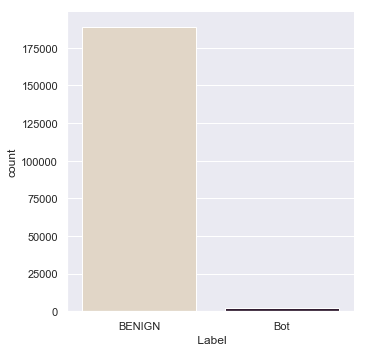

In [6]:
# count for both categories.
sns.catplot(x=" Label", kind="count", palette="ch:.25", data=df_clean);

#### We see a relative very small count for 'Bot' attack. We are dealing with imbalanced dataset. One option is to run a SMOTE resampling. 
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

### Drilling down at different feature across labels (BENIGN - vs - Bot)
####  *Fwd Packet Length Mean* 

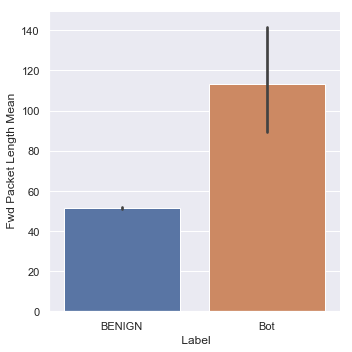

In [7]:
# bar plot
sns.catplot(x=" Label", y=" Fwd Packet Length Mean",kind="bar",data=df_clean);

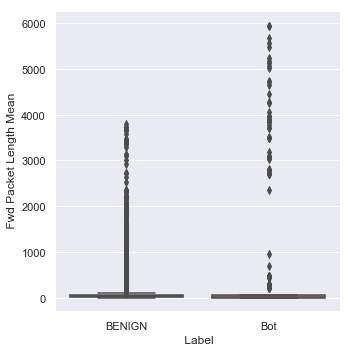

In [8]:
# box plot
sns.catplot(x=" Label", y=" Fwd Packet Length Mean",kind="box",data=df_clean);

### Point plots seems to be most intuitive to compare between two classes across features.
 It plots the point estimate and confidence interval and shows a difference in slope. 

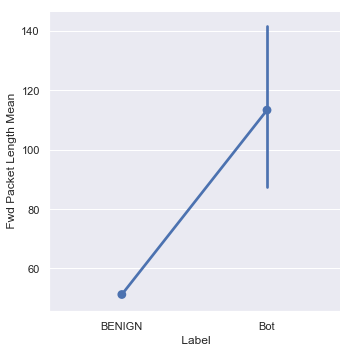

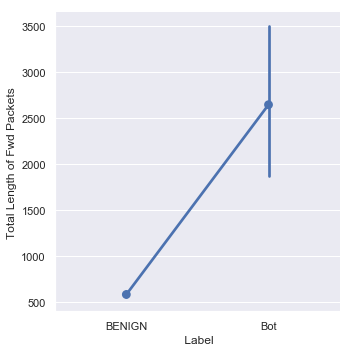

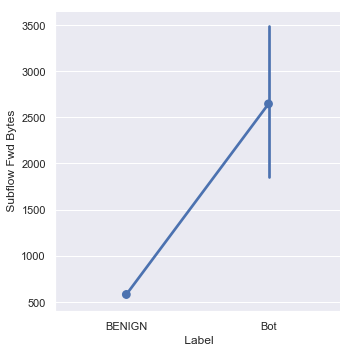

In [9]:
# point plot
sns.catplot(x=" Label", y=" Fwd Packet Length Mean",kind="point",data=df_clean);
sns.catplot(x=" Label", y="Total Length of Fwd Packets",kind="point",data=df_clean);
sns.catplot(x=" Label", y=" Subflow Fwd Bytes",kind="point",data=df_clean);


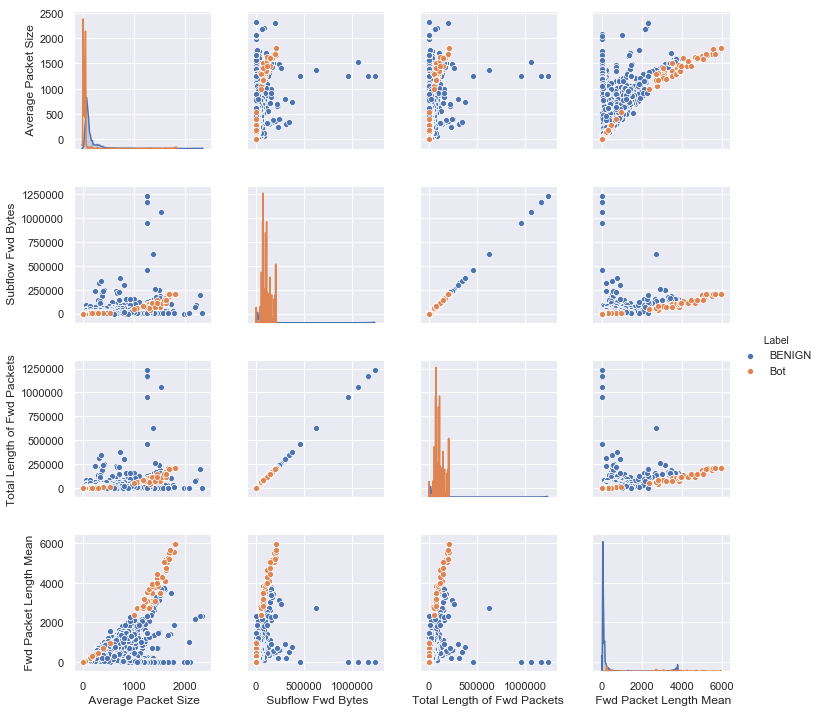

In [19]:
# create pair-plots to compare all of them together.
sns.pairplot(df_clean, hue=' Label', height=2.5);